# Bike sharing 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

from sklearn import preprocessing
from sklearn.utils import shuffle

## Load the dataset

In [26]:
dataset = pd.read_csv('../data/bike_day.csv')
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [27]:
dataset.values

array([[1, '2011-01-01', 1, ..., 331, 654, 985],
       [2, '2011-01-02', 1, ..., 131, 670, 801],
       [3, '2011-01-03', 1, ..., 120, 1229, 1349],
       ..., 
       [729, '2012-12-29', 1, ..., 159, 1182, 1341],
       [730, '2012-12-30', 1, ..., 364, 1432, 1796],
       [731, '2012-12-31', 1, ..., 439, 2290, 2729]], dtype=object)

## Train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = dataset.values[:, 2:13]
y = dataset.values[:, -1]

In [30]:
y

array([985, 801, 1349, 1562, 1600, 1606, 1510, 959, 822, 1321, 1263, 1162,
       1406, 1421, 1248, 1204, 1000, 683, 1650, 1927, 1543, 981, 986, 1416,
       1985, 506, 431, 1167, 1098, 1096, 1501, 1360, 1526, 1550, 1708,
       1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589, 1913, 1815,
       2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807, 1461, 1969,
       2402, 1446, 1851, 2134, 1685, 1944, 2077, 605, 1872, 2133, 1891,
       623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239, 3117, 2471,
       2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536, 1685,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126, 795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Model

In [32]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2)
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [33]:
y_pred_test = rf_model.predict(x_test)

In [34]:
mse = mean_squared_error(y_test, y_pred_test)
evs = explained_variance_score(y_test, y_pred_test)

In [35]:
print mse
print evs

431910.12138
0.886664053772


## Feature importance

In [36]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure(figsize=(14, 8),)
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

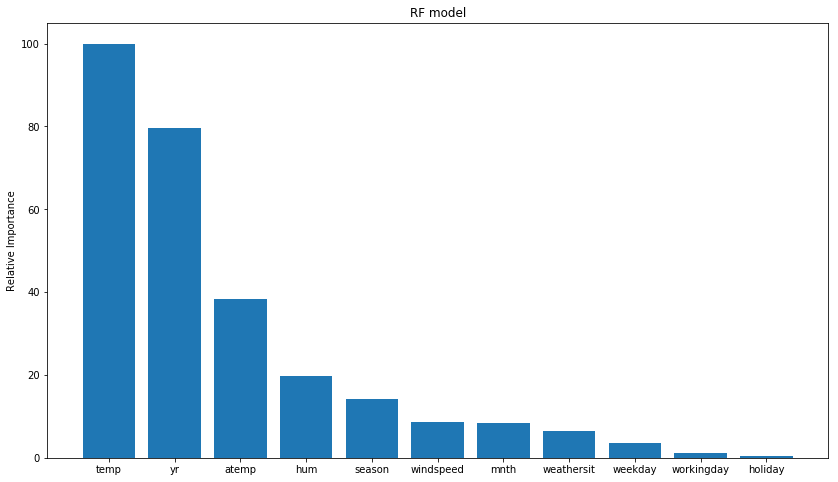

In [37]:
plot_feature_importances(rf_model.feature_importances_, 'RF model', dataset.columns[2:13])

## Last two features

In [38]:
x = dataset.values[:, 2:15]
y = dataset.values[:, -1]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [40]:
rf_model_2 = rf_model.fit(x_train, y_train)

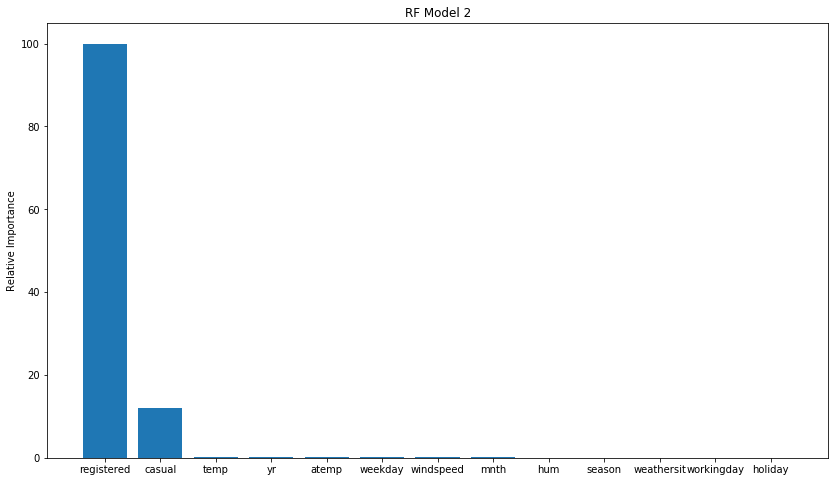

In [41]:
plot_feature_importances(rf_model_2.feature_importances_, 'RF Model 2', dataset.columns[2:15])

# Bike Hour

In [42]:
dataset = pd.read_csv('../data/bike_hour.csv')
dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [43]:
x = dataset.values[:, 2:14]
y = dataset.values[:, -1]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [45]:
rf_model_3 = rf_model.fit(x_train, y_train)

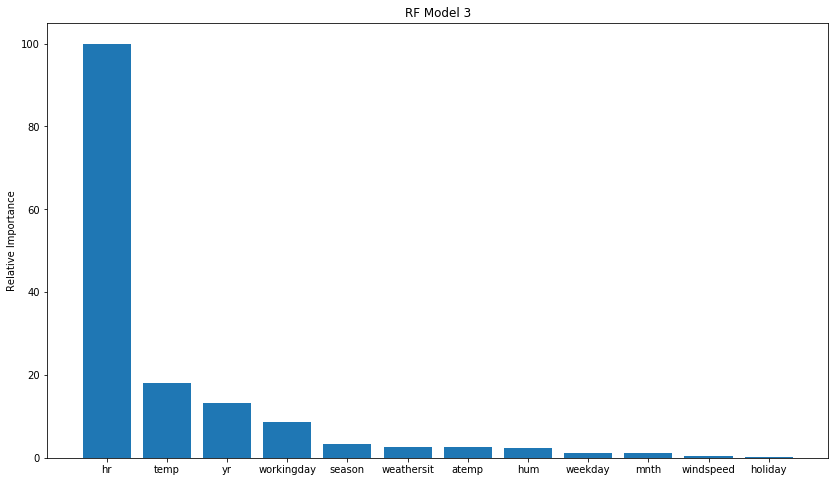

In [46]:
plot_feature_importances(rf_model_3.feature_importances_, 'RF Model 3', dataset.columns[2:14])